In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

alpha = 0.05

In [2]:
""" load data """

spotify = pd.read_csv('spotify52kData.csv')
star = pd.read_csv('starRatings.csv', header=None)

# spotify.head()
# star.head()

In [3]:
"""
convert data to proper types (numeric, boolean...)

in spotify52kData,
songNumber, popularity, duration, danceability, energy, key, loudness, mode
speechiness, acoustincness, instrumentalness, liveness, valence, tempo, and time_signature
are all converted to numeric data

all data in star should be numeric
"""

spotify['songNumber'] = pd.to_numeric(spotify['songNumber'], errors='coerce')
spotify['popularity'] = pd.to_numeric(spotify['popularity'], errors='coerce')
spotify['duration'] = pd.to_numeric(spotify['duration'], errors='coerce')
spotify['danceability'] = pd.to_numeric(spotify['danceability'], errors='coerce')
spotify['energy'] = pd.to_numeric(spotify['energy'], errors='coerce')
spotify['key'] = pd.to_numeric(spotify['key'], errors='coerce')
spotify['loudness'] = pd.to_numeric(spotify['loudness'], errors='coerce')
spotify['mode'] = pd.to_numeric(spotify['mode'], errors='coerce')
spotify['speechiness'] = pd.to_numeric(spotify['speechiness'], errors='coerce')
spotify['acousticness'] = pd.to_numeric(spotify['acousticness'], errors='coerce')
spotify['instrumentalness'] = pd.to_numeric(spotify['instrumentalness'], errors='coerce')
spotify['liveness'] = pd.to_numeric(spotify['liveness'], errors='coerce')
spotify['valence'] = pd.to_numeric(spotify['valence'], errors='coerce')
spotify['tempo'] = pd.to_numeric(spotify['tempo'], errors='coerce')
spotify['time_signature'] = pd.to_numeric(spotify['time_signature'], errors='coerce')
star = star.apply(pd.to_numeric, errors='coerce')

In [5]:
""" row-wise removal overall """

# spotify = spotify.dropna()

# star = star.dropna()

""" row-wise removal based on certain column """

# spotify = spotify.dropna(subset=['Popularity']) ###

# star = star.drop(star[0].isna().index) # user removal based on whether that user rated a song

""" column-wise removal based on certain row (make more sense to do in star data) """

# star = star.drop(df.columns[star.iloc[0].isna()], axis=1) # song removal based on whether it has missing ratings

""" imputation with average """

# spotify['popularity'] = spotify['popularity'].fillna(spotify['popularity'].mean())

# star = star.fillna(star.mean()) # impute nan values with average ratings of songs

# star = star.fillna(star.mean(axis=1)) # impute nan values with average ratings of users to all songs

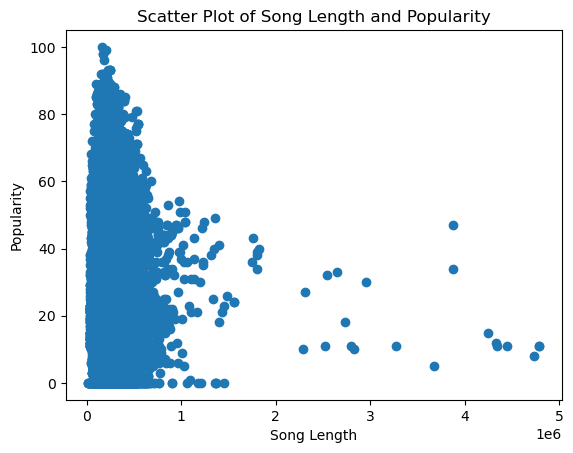

Reject the null hypothesis, for p-value being 0.0, which is smaller than alpha value 0.05.


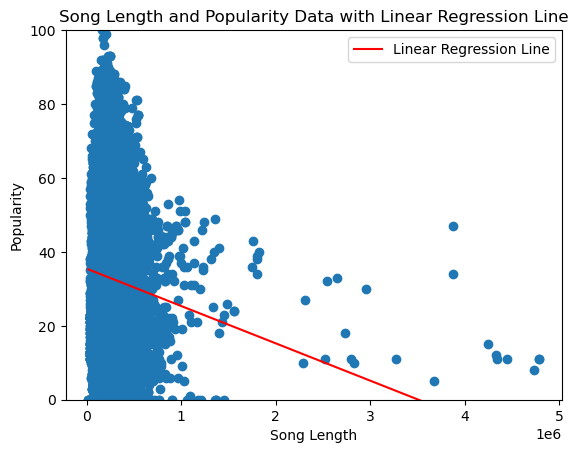

Since the coef is [-1.00976878e-05], the relationship is negative


In [36]:
""" 1) Is there a relationship between song length and popularity of a song? """

song_len = spotify['duration']
song_popu = spotify['popularity']


""" 1.1) Plot graph """
""" Songs that are popular have shorter length, but the relationship is not clear from the graph """

plt.scatter(spotify['duration'], spotify['popularity'])
plt.xlabel('Song Length')
plt.ylabel('Popularity')
plt.title('Scatter Plot of Song Length and Popularity')
plt.show()


""" 1.2) Choose and do significance test """
""" 
Roadmap of choosing a classical significance test from class slide was used here. 

Is it reasonable to reduce the data to sample means? 
    No. The data are skewed at one point, so median is more reasonable. 
    
Is the data categorical?
    No. The data is numeric

How many groups are compared in the design?
    2 groups - Song length and Popularity
    
Compare medians or shapes of distributions?
    Medians is reasonable

--> Mann Whiteney U Test

Null hypothesis: there is no relationship between song length and popularity of a song

p-value = 0, the statistical test indicates that there is a strong relationship

"""

statistic, pvalue = stats.mannwhitneyu(spotify['duration'], spotify['popularity'])

if pvalue > alpha:
    print("""Cannot reject the null hypothesis, for p-value being {}, which is larger than alpha value 0.05.""".format(pvalue))
else:
    print("""Reject the null hypothesis, for p-value being {}, which is smaller than alpha value 0.05.""".format(pvalue))
    
    
    
""" 1.3) If so, is it positive or negative? """
linear_reg = LinearRegression()
linear_reg.fit(spotify[['duration']], spotify['popularity'])


random_x = np.linspace(spotify['duration'].min(), spotify['duration'].max(), 100) ###
linear_reg_line = linear_reg.coef_ * random_x + linear_reg.intercept_

plt.scatter(spotify['duration'], spotify['popularity'])
plt.plot(random_x, linear_reg_line, color='red', label='Linear Regression Line')
plt.ylim(0, 100)
plt.xlabel('Song Length')
plt.ylabel('Popularity')
plt.title('Song Length and Popularity Data with Linear Regression Line')
plt.legend()
plt.show()


if (linear_reg.coef_ > 0):
    print("Since the coef is {}, the relationship is positive".format(linear_reg.coef_))
elif (linear_reg.coef_ < 0):
    print("Since the coef is {}, the relationship is negative".format(linear_reg.coef_))


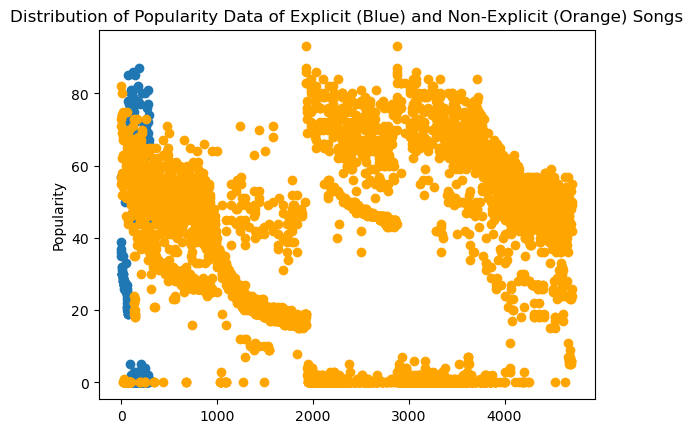

Reject the null hypothesis, for p-value being 0.0005262313903611156, which is smaller than alpha value 0.05.
Popularity mean of explicit songs: 28.322033898305083
popularity mean of non-explicit songs: 34.218490967056326
Explicitly rated songs might not be more popular than songs that are not explicit.


In [37]:
""" 2) Are explicitly rated songs more popular than songs that are not explicit? """

""" 2.1) Data cleaning with row-wise removal """

explicit = spotify['explicit'].head(5000) # since the star data only has ratings of the first 5k song
popularity = spotify['popularity'].head(5000)
question2_df = pd.DataFrame({'Popularity': popularity, 'Explicity': explicit})
question2_df = question2_df.dropna() # row-wise removal

# if interested at the distribution of the data, here is the graph:

plt.scatter(range(0, len(question2_df[question2_df['Explicity']==True]['Popularity'])), 
            question2_df[question2_df['Explicity']==True]['Popularity'])
plt.scatter(range(0, len(question2_df[question2_df['Explicity']==False]['Popularity'])), 
            question2_df[question2_df['Explicity']==False]['Popularity'], color='orange')
plt.title('Distribution of Popularity Data of Explicit (Blue) and Non-Explicit (Orange) Songs')
plt.ylabel('Popularity')
plt.show()

""" 2.2) Choose and do significance test """
"""
Roadmap of choosing a classical significance test from class slide was used here. 

Is it reasonable to reduce the data to sample means? 
    No. The popularities are specific for each correspondign song. It would be ambiguous to calculate the mean
    
Is the data categorical?
    No

How many groups are compared in the design?
    2 groups - Popularity of songs that are explicit and those that are not
    
Compare medians or shapes of distributions?
    Inspecting the graph, the popularity of both explicit and non-explicit songs 
    are not normally distributed. However since we are not that interested in the shape of the
    distribution, median is enough

--> Mann Whiteney U Test

Null hypothesis: there is no relationship between explicity and popularity of a song

p-value = 0.0005, the statistical test indicates that there is a significant relationship

"""

statistic, pvalue = stats.mannwhitneyu(question2_df[question2_df['Explicity']==True]['Popularity'], 
                              question2_df[question2_df['Explicity'] == False]['Popularity'])

if pvalue > alpha:
    print("""Cannot reject the null hypothesis, for p-value being {}, which is larger than alpha value 0.05.""".format(pvalue))
else:
    print("""Reject the null hypothesis, for p-value being {}, which is smaller than alpha value 0.05.""".format(pvalue))

    
""" 2.3) are explicitly rated songs more popular than songs that are not explicit? """

popularity_mean_explicit = np.mean(question2_df[question2_df['Explicity']==True]['Popularity'])
popularity_mean_not_explicit = np.mean(question2_df[question2_df['Explicity']==False]['Popularity'])

print("Popularity mean of explicit songs:", popularity_mean_explicit)
print("Popularity mean of non-explicit songs:", popularity_mean_not_explicit)

if (popularity_mean_explicit > popularity_mean_not_explicit):
    print("Explicitly rated songs might be more popular than songs that are not explicit.")
else:
    print("Explicitly rated songs might not be more popular than songs that are not explicit.")


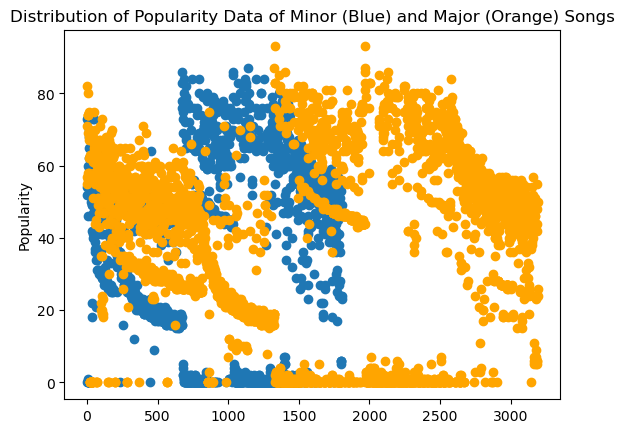

Reject the null hypothesis, for p-value being 0.02446205139429191, which is smaller than alpha value 0.05.
Popularity mean of minor songs: 32.866002214839426
Popularity mean of major songs: 34.43863494051346
Minor song might NOT be more popular.


In [10]:
""" 3) Are songs in major key more popular than songs in minor key? """

""" 3.1) Data cleaning with row-wise removal """

mode = spotify['mode'].head(5000)
popularity = spotify['popularity'].head(5000)
question3_df = pd.DataFrame({'Popularity': popularity, 'Mode': mode})
question3_df = question3_df.dropna() # row-wise removal

# if interested at the distribution of the data, here is the graph:

plt.scatter(range(0, len(question3_df[question3_df['Mode']==0]['Popularity'])), 
            question3_df[question3_df['Mode']==0]['Popularity'])
plt.scatter(range(0, len(question3_df[question3_df['Mode']==1]['Popularity'])), 
            question3_df[question3_df['Mode']==1]['Popularity'], color='orange')
plt.title('Distribution of Popularity Data of Minor (Blue) and Major (Orange) Songs')
plt.ylabel('Popularity')
plt.show()

""" 3.2) use the same test as that of question 2 """

""" Null hypothesis: there is no relationship between song length and popularity of a song """

statistic, pvalue = stats.mannwhitneyu(question3_df[question3_df['Mode']==0]['Popularity'], 
                              question3_df[question3_df['Mode'] == 1]['Popularity'])

if pvalue > alpha:
    print("""Cannot reject the null hypothesis, for p-value being {}, which is larger than alpha value 0.05.""".format(pvalue))
else:
    print("""Reject the null hypothesis, for p-value being {}, which is smaller than alpha value 0.05.""".format(pvalue))

    
""" 3.3) are songs in major key more popular than songs in minor key? """

popularity_mean_minor = np.mean(question3_df[question3_df['Mode']==0]['Popularity'])
popularity_mean_major = np.mean(question3_df[question3_df['Mode']==1]['Popularity'])

print("Popularity mean of minor songs:", popularity_mean_minor)
print("Popularity mean of major songs:", popularity_mean_major)

if (popularity_mean_minor > popularity_mean_major):
    print("Minor songs might be more popular.")
else:
    print("Minor song might NOT be more popular.")


,Feature,RMSE
6,instrumentalness,21.457801
2,energy,21.575981
4,speechiness,21.680824
9,tempo,21.722277
1,danceability,21.746544
3,loudness,21.772101
8,valence,21.788059
5,acousticness,21.788331
0,duration,21.794424
7,liveness,21.824609


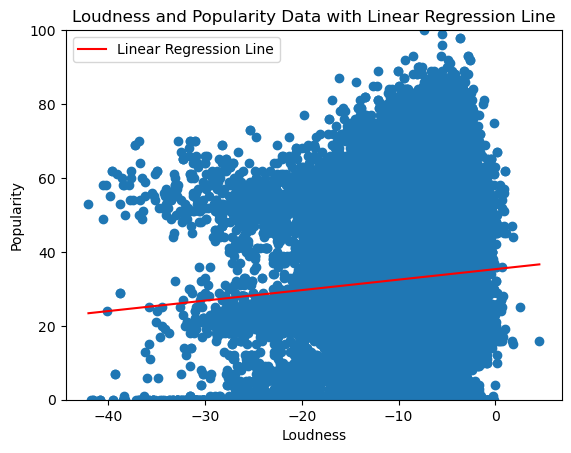

In [19]:
"""
4) Which of the following 10 song features: duration, danceability, energy, loudness, speechiness, acousticness, 
instrumentalness, liveness, valence and tempo predicts popularity best? How good is this model?
"""

features = ['duration', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 
            'instrumentalness', 'liveness', 'valence', 'tempo']
linear_reg_values = []
rmse = []


for f in features:
    """ 
    4.1) Linear regression is used for simplicity and for prediction of popularity based on
    data of each feature 
    """
    linear_reg = LinearRegression()
    
    """
    4.2) 8/2 Train/Test split of data is done for training and testing the linear regression model
    """
    input_train, input_test, output_train, output_test = train_test_split(spotify[[f]], 
                                                                          spotify['popularity'], 
                                                                          test_size=0.20)
    linear_reg.fit(input_train, output_train)
    linear_reg_values.append([linear_reg.coef_, linear_reg.intercept_])
    output_pred = linear_reg.predict(input_test)
    
    """ 4.3) RMSE is calculated to evaluate the model performance """
    rmse.append(np.sqrt(mean_squared_error(output_test, output_pred)))

display(pd.DataFrame({'Feature': features, 'RMSE': rmse}).sort_values(by='RMSE', ascending=True))

"""
4.4) Inspecting the RMSE table, one may realize that loudness has the lowest the RMSE. 

Here is a graph of how linear regression line predicts the loudness data
"""

random_x = np.linspace(spotify['loudness'].min(), spotify['loudness'].max(), 100)
linear_reg_line = linear_reg_values[3][0] * random_x + linear_reg_values[3][1]

plt.scatter(spotify['loudness'], spotify['popularity'])
plt.plot(random_x, linear_reg_line, color='red', label='Linear Regression Line')
plt.ylim(0, 100)
plt.xlabel('Loudness')
plt.ylabel('Popularity')
plt.title('Loudness and Popularity Data with Linear Regression Line')
plt.legend()
plt.show()

In [20]:
question5_df = spotify[['popularity', 'duration', 'danceability', 'energy', 'loudness', 'speechiness', 
                        'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']].dropna()

In [31]:
"""
5) Building a model that uses *all* of the song features mentioned in question 4 
('question 1' is a type according to the Discord chat), how well can you predict popularity? 
How much (if at all) is this model improved compared to the model in question 4. 
How do you account for this? What happens if you regularize your model?
"""

# row-wise removal
question5_df = spotify[['popularity', 'duration', 'danceability', 'energy', 'loudness', 'speechiness', 
                        'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']].dropna()

input_train, input_test, output_train, output_test = train_test_split(question5_df[features], 
                                                                      question5_df['popularity'], 
                                                                      test_size=0.20)

"""
5.1) Build multiple linear regression based on features
"""

linear_reg_multi = LinearRegression()
linear_reg_multi.fit(input_train, output_train)
output_pred = linear_reg_multi.predict(input_test)

"""
5.2) Compare using RMSE
"""

rmse_multi = np.sqrt(mean_squared_error(output_test, output_pred)) # 21.17348602780182

"""
5.3) Regularize model using Ridge and Lasso Regression to prevent overfitting
"""

hyperparameters = {'alpha': [0, 0.01, 0.1, 1, 10, 30, 40, 50, 100]}
ridge_regressor = GridSearchCV(Ridge(), hyperparameters, scoring='neg_mean_squared_error') ###
ridge_regressor = ridge_regressor.fit(input_train, output_train)
output_pred_ridge = ridge_regressor.predict(input_test)

hyperparameters = {'alpha': [0.01, 0.1, 1, 10, 30, 40, 50, 100]}
lasso_regressor = GridSearchCV(Lasso(), hyperparameters, scoring='neg_mean_squared_error') ###
lasso_regressor = lasso_regressor.fit(input_train, output_train)
output_pred_lasso = ridge_regressor.predict(input_test)

"""
5.4) Compare using RMSE
"""

rmse_ridge = np.sqrt(mean_squared_error(output_test, output_pred_ridge)) # 21.066651915961
rmse_lasso = np.sqrt(mean_squared_error(output_test, output_pred_lasso)) # 21.066651915961

"""
5.5) How do you account for this? 
    Greater data dimension -> more specified the model in prediction
"""

In [110]:
# HAPPY LITTLE ACCIDENTS

# inter-individyal variability check using range
# (star.max(axis=1, skipna=True) - star.min(axis=1, skipna=True)).sort_values(ascending=True) 

# ratings = star.mean() # use the mean rating of each movie

# ANOVA
# statistic, pvalue = stats.f_oneway(question2_df[question2_df['Explicity']==True]['Popularity'], 
#                               question2_df[question2_df['Explicity'] == False]['Popularity'])